In [1]:
import os
os.environ['comspec']='powershell.exe'
os.getenv('comspec')

import sys
sys.path.append("../code_snippets_settings/") # this is the project module with functions
import snippets

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


plt.style.use('../code_snippets_settings/matplotlibrc') # this file sets our global settings for plotting(makes less bloated in the notebook)


path = 'https://www.openintro.org/data/csv/' # url path to openintro.org data # access remote source

# path = %pwd # local path if you had downloaded the data
# path += '/csv/' 

# 1.9.1 Case study: using stents to prevent strokes

To follow along [click here]()

---

## 1.1 Migraine and acupuncture

A migraine is a particularly painful type of headache, which patients sometimes wish to treat with acupuncture. To determine whether acupuncture relieves migraine pain, researchers conducted a randomized controlled study where 89 females diagnosed with migraine headaches were randomly assigned to one of two groups: treatment or control. 43 patients in the treatment group received acupuncture that is speciﬁcally designed to treat migraines. 46 patients in the control group received placebo acupuncture (needle insertion at nonacupoint locations). 24 hours after patients received acupuncture, they were asked if they were pain free. Results are summarized in the contingency table below

In [2]:
df1 = pd.read_csv(path+'/migraine.csv')
df1 = (df1.groupby('group')
      .agg([('value_counts')])  # creates n columns from n category frequency counts
      .unstack(1)
      .droplevel(1, axis=1)
      .droplevel(0, axis=1) # if this isnt dropped, use commented out code below for fancy switching
      )

# df = (df.loc[['treatment', 'control']]               # swaps index rows
#       [[('pain_free', 'yes'), ('pain_free','no')]])  # swaps multi-index columns
df1['total'] = df1.sum(1)
df1 = df1.append(df1.sum().rename('total'))
treatment = round(df1.loc['treatment', 'yes']/df1.loc['treatment', 'total']*100, 1)
control = round(df1.loc['control', 'yes']/df1.loc['control', 'total']*100, 1)
total = round(df1.loc['total', 'yes']/df1.loc['control', 'total']*100, 1)
print(df1)
print(f"\nTreatment group pain-free outcome?\n{treatment}%")
print(f"\nControl group pain-free outcome?\n{control}%")
print(f"\nTotal pain-free outcome?\n{total}%")

pain_free  no  yes  total
group                    
control    44    2     46
treatment  33   10     43
total      77   12     89

Treatment group pain-free outcome?
23.3%

Control group pain-free outcome?
4.3%

Total pain-free outcome?
26.1%


## 1.2 Sinusitis and antibiotics

Researchers studying the effect of antibiotic treatment for acute sinusitis 
compared to symptomatic treatments randomly assigned 166 adults diagnosed 
with acute sinusitis to one of two groups: treatment or control. Study 
participants received either a 10-day course of amoxicillin (an antibiotic) 
or a placebo similar in appearance and taste. The placebo consisted of 
symptomatic treatments such as acetaminophen, nasal decongestants, etc.
At the end of the 10-day period, patients were asked if
they experienced improvement in symptoms.
The distribution of responses is summarized below.

In [3]:
df2 = pd.read_csv(path+'/sinusitis.csv')

df2 = (df2.groupby('group')
      .agg([('value_counts')])  # creates n columns from n category frequency counts
      .unstack(1)
      .droplevel(1, axis=1)
      .droplevel(0, axis=1) # if this isnt dropped, use commented out code below for fancy switching
      )

df2['total'] = df2.sum(1)
df2 = df2.append(df2.sum().rename('total'))

treatment = round(df2.loc['treatment', 'yes']/df2.loc['treatment', 'total']*100, 1)
control = round(df2.loc['control', 'yes']/df2.loc['control', 'total']*100, 1)
print(df2)
print(f"\nTreatment group outcome?\n{treatment}%")
print(f"\nControl group outcome?\n{control}%")

self_reported_improvement  no  yes  total
group                                    
control                    16   65     81
treatment                  19   66     85
total                      35  131    166

Treatment group outcome?
77.6%

Control group outcome?
80.2%


---

# 1.9.2 Data basics

## 1.3 Air pollution and birth outcomes, study components
 
Researchers collected data to examine the relationship between air pollutants 
and preterm births in Southern California. During the study air pollution levels 
were measured by air quality monitoring stations. Specifically, levels of carbon 
monoxide were recorded in parts per million, nitrogen dioxide and ozone in parts 
per hundred million, and coarse particulate matter (PM$_{10}$) in $\mu g/m^3$. 
Length of gestation data were collected on 143,196 births between the years 1989 
and 1993, and air pollution exposure during gestation was calculated for each 
birth. The analysis suggested that increased ambient PM$_{10}$ and, to a lesser 
degree, CO concentrations may be associated with the occurrence of preterm births

**a) the cases:** study subjects born between 1989 and 1993  
**b) variables and thier types:** continuous numerical variables    
**c) main research question:** is there a relationship between air pollution and pre-term births  

## 1.4 Buteyko method, study components
The Buteyko method is a shallow breathing technique developed by Konstantin 
Buteyko, a Russian doctor, in 1952. Anecdotal evidence suggests that the Buteyko 
method can reduce asthma symptoms and improve quality of life. In a scientific 
study to determine the effectiveness of this method, researchers recruited 600 
asthma patients aged 18-69 who relied on medication for asthma treatment. These 
patients were randomly split into two research groups: one practiced the Buteyko 
method and the other did not. Patients were scored on quality of life, activity, 
asthma symptoms, and medication reduction on a scale from 0 to 10. On average, 
the participants in the Buteyko group experienced a significant reduction in 
asthma symptoms and an improvement in quality of life.

**a) the cases:** 600 asthma patients ages 18-69 on asthma medication   
**b) variables and thier types:** (quality of life, activity, asthma symptoms, medication reduction): discrete numerical variables 0-10  
**c) main research question:** can the Buteyko method reduce asthma syptoms and improve quality of life 

## 1.5 Cheaters, study components

Researchers studying the relationship between honesty, age and self-control 
conducted an experiment on 160 children between the ages of 5 and 15. 
Participants reported their age, sex, and whether they were an only child 
or not. The researchers asked each child to toss a fair coin in private and 
to record the outcome (white or black) on a paper sheet, and said they 
would only reward children who report white.
The study's findings can be summarized as follows:
Half the students were explicitly told not to cheat and the others were not given any explicit 
instructions.
In the no instruction group probability of cheating was found to 
be uniform across groups based on child's characteristics.
In the group that was 
explicitly told to not cheat, girls were less likely to cheat,
and while rate 
of cheating didn't vary by age for boys, it decreased with age
for girls

**a) cases:** 160 children aged 5-15  
**b) variables:** age: continuous numerical, sex: categorical, only child: categorical, cheated or not: categorical  
**c) research question:** does telling children not to cheat affect likelihood of them cheating

## 1.6 Stealing, study components
In a study of the relationship between socio-economic class and unethical 
behavior, 129 University of California undergraduates at Berkeley were asked 
to identify themselves as having low or high social-class by comparing 
themselves to others with the most (least) money, most (least) education, and 
most (least) respected jobs. They were also presented with a jar of 
individually wrapped candies and informed that the candies were for children
in a nearby laboratory, but that they could take some if they wanted. After 
completing some unrelated tasks, participants reported the number of candies 
they had taken.

**a) cases:** 129 University of California undergraduates  
**b) variables:** most/least money: categorical, most/least education: categorical, most/least respected jobs: categorical  
**c) research question:** is there a relationship taking/giving candy and self reported socio-economic class  

## 1.7 Fisher's irises
English statistician, evolutionary biologist, and geneticist who worked on a 
data set that contained sepal length and width, and petal length and width from 
three species of iris flowers

a) 150 cases  
b) 4 numeric continuous variables(sepal length and width, petal length and width) all   
c) 3 regular categorical variables(setosa, versicolor, virginica)  

## 1.8 Smoking habits of UK residents
A survey was conducted to study the smoking habits of UK residents. Below is a data 
matrix displaying a portion of the data collected in this survey. Note `N/A` refers to a missing component of the data.


In [4]:
smoking = pd.read_csv(path+'/smoking.csv')
print("Participants: ",smoking.size)
smoking.head()

Participants:  20292


,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type
0,Male,38,Divorced,No Qualification,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN
1,Female,42,Single,No Qualification,British,White,"Under 2,600",The North,Yes,12.0,12.0,Packets
2,Male,40,Married,Degree,English,White,"28,600 to 36,400",The North,No,NaN,NaN,NaN
3,Female,40,Married,Degree,English,White,"10,400 to 15,600",The North,No,NaN,NaN,NaN
4,Female,39,Married,GCSE/O Level,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN


In [5]:
# smokers by income level
grouped = smoking.groupby(['gross_income', 'smoke']).size().to_frame()

idx = pd.IndexSlice # for slicing multiindex
d= {'No':grouped.loc[idx[:,'No'],].droplevel(1),
    'Yes': grouped.loc[idx[:,'Yes'],].droplevel(1)}

pd.concat(d, axis=1).droplevel(1, axis=1)

,No,Yes
gross_income,,
"10,400 to 15,600",185,83
"15,600 to 20,800",143,45
"2,600 to 5,200",193,64
"20,800 to 28,600",117,38
"28,600 to 36,400",70,9
"5,200 to 10,400",289,107
"Above 36,400",74,15
Refused,87,21
"Under 2,600",97,36


**a) case:** resident  
**b) participants:** 20292 participants  
**c) variable types:**    
categorical         : (sex, marital, smoke)  
ordinal categorical : (gross_income, amt_weekends, amt_weekdays)  
continuous numerical: (age)  

---

# 1.9.3 Overview of data collection principals

![Figure](https://jethinabrahamcom.files.wordpress.com/2017/02/scope-of-ineference.png?w=720 "Figure")

## 1.9 Air pollution and birth outcomes, scope of inference
A study
where researchers collected data to examine the relationship between air pollutants and preterm
births in Southern California. During the study air pollution levels were measured by air quality
monitoring stations. Length of gestation data were collected on 143,196 births between the years
1989 and 1993, and air pollution exposure during gestation was calculated for each birth.

a) population of interest: all births,  
sample: southern California births from 89' to 93'   
b) the sample can be used to generalize the population of Southern California.   
since the study is observational, it cannot be used to establish causal relationships between variables


## 1.10 Cheaters, scope of inference
A study where researchers studying
the relationship between honesty, age, and self-control conducted an experiment on 160 children
between the ages of 5 and 15. The researchers asked each child to toss a fair coin in private and to
record the outcome (white or black) on a paper sheet, and said they would only reward children
who report white. Half the students were explicitly told not to cheat and the others were not given
any explicit instructions. Differences were observed in the cheating rates in the instruction and no
instruction groups, as well as some differences across children’s characteristics within each group.

a) pop of interest: children ages 5-15, sample: 160 children aged 5-15   
b) not generalizable no random sampling  
cant be used to establish causal relationship: no random assignment  

## 1.11 Buteyko method, scope of inference
a study on using the
Buteyko shallow breathing technique to reduce asthma symptoms and improve quality of life. As
part of this study 600 asthma patients aged 18-69 who relied on medication for asthma treatment
were recruited and randomly assigned to two groups: one practiced the Buteyko method and the
other did not. Those in the Buteyko group experienced, on average, a significant reduction in
asthma symptoms and an improvement in quality of life.


a) population of interest: patients with asthma aged 18-69 on meds, sample: 600 patients of same description    
b) generalizable to the population of interest, experimental random assignment: CAN be used to establish causal relationship with this sample  

## 1.12 Stealers, scope of inference

A study on the relationship between
socio-economic class and unethical behavior. As part of this study 129 University of California
Berkeley undergraduates were asked to identify themselves as having low or high social-class by
comparing themselves to others with the most (least) money, most (least) education, and most
(least) respected jobs. They were also presented with a jar of individually wrapped candies and
informed that the candies were for children in a nearby laboratory, but that they could take some if
they wanted. After completing some unrelated tasks, participants reported the number of candies
they had taken. It was found that those who were identified as upper-class took more candy than
others.

a) population of interest: UC Berkeley undergrads, sample: 129 such cases  
b) generalizable to population of interest, students self-assigned so no causal relationship can be established

## 1.13 Relaxing after work
The 2010 General Social Survey asked the question, “After an
average work day, about how many hours do you have to relax or pursue activities that you
enjoy?” to a random sample of 1,155 Americans. The average relaxing time was found to be 1.65
hours. Determine which of the following is an observation, a variable, a sample statistic, or a
population parameter.

**a) american in sample:** observation  
**b) num hours spent relaxing:** variable  
**c) 1.65 is sample statistic (mean)**   
**d) average num of hours Americans spend relaxing:** population parameter (mean)  

## 1.14 Cats on YouTube
Suppose you want to estimate the percentage of videos on YouTube
that are cat videos. It is impossible for you to watch all videos on YouTube so you use a random
video picker to select 1000 videos for you. You find that 2% of these videos are cat videos.Determine
which of the following is an observation, a variable, a sample statistic, or a population parameter.

**a) population parameter:** % of cat videos on youtube  
**b) sample statistic:** 2%  
**c) observation:** each video in sample  
**d) variable:** cat video, yes/no  

## 1.15 GPA and study hours
A survey was conducted on 193 Duke University undergraduates
who took an introductory statistics course in 2012. Among many other questions, this survey
asked them about their GPA, which can range between 0 and 4 points, and the number of hours
they spent studying per week. The scatterplot below displays the relationship between these two
variables.


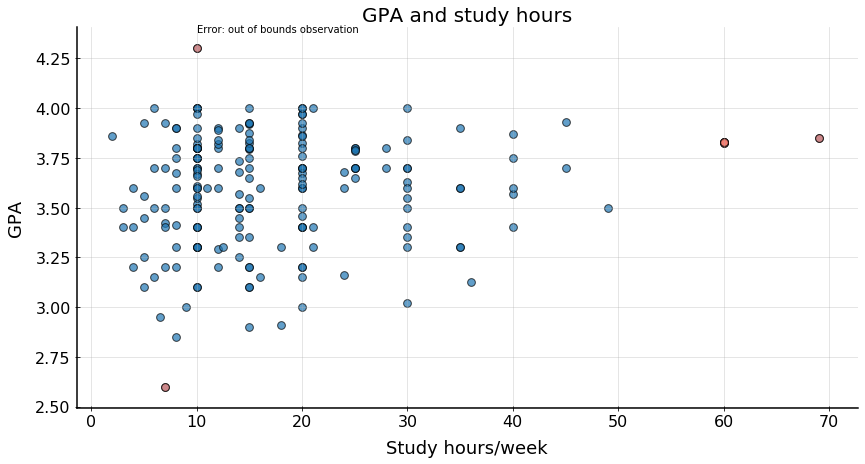

In [6]:
df3 = pd.read_csv(path+'/gpa_study_hours.csv')

outliers = df3[(df3.gpa > df3.gpa.quantile(0.995)) | 
               (df3.gpa < df3.gpa.quantile(0.005)) |
               (df3.study_hours > df3.study_hours.quantile(0.980))]

error = (df3.iloc[df3.gpa.idxmax(axis=0), :]+0.08).to_list() # for annotating error

df3.plot.scatter(x='study_hours', y='gpa', alpha=0.7, s=60).set(xlabel='Study hours/week', ylabel='GPA', title='GPA and study hours');
plt.scatter(data=outliers, x='study_hours', y='gpa', alpha=0.7, s=60, c='salmon');
plt.text(error[1], error[0], s='Error: out of bounds observation');

**a) explanatory var: study hours, response var:** gpa   
**b) seems to be a weak positive correlation between hours studied and gpa. there is one gpa observation that is over 4.0.**  
**c) experiment or observation:** observational study  
**d) any conclusions?** we connot conclude anything because this is an observational study and not an experimental study

## 1.16 Income and education in US countries
The scatterplot below shows the relationship
between per capita income (in thousands of dollars) and percent of population with a bachelor’s
degree in 3,143 counties in the US in 2010.


,state,name,pop2010,bachelors_2010,per_capita_income_2010
0,Virginia,Falls Church city,12332,71.0,55389
1,Colorado,Pitkin County,17148,59.7,64381
2,Virginia,Arlington County,207627,70.1,57724
3,New York,New York County,1585873,57.0,59149


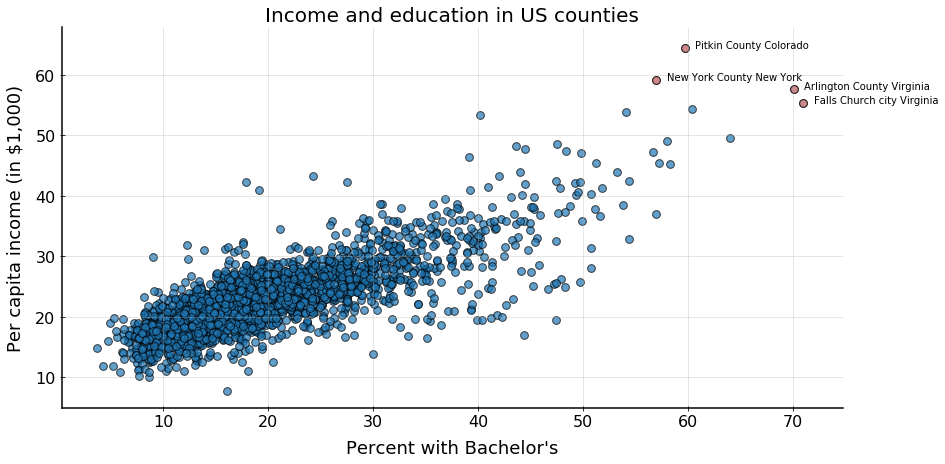

In [7]:
df4 = pd.read_csv('./csv/county_complete.csv')[['state', 'name', 'pop2010', 'bachelors_2010', 'per_capita_income_2010']]

(df4.plot.scatter(
    x='bachelors_2010', 
    y='per_capita_income_2010', 
    alpha=0.7, s=60)
 .set(xlabel="Percent with Bachelor's", 
     ylabel="Per capita income (in $1,000)", 
     title='Income and education in US counties',
     yticklabels=np.arange(0, 70, 10)));

outliers = df4[df4.per_capita_income_2010 > df4.per_capita_income_2010.quantile(.999)].sort_values('pop2010').reset_index(drop=True)
snippets.plot_ouliers_annotate(outliers, 'bachelors_2010', y='per_capita_income_2010', txt_1='name', txt_2='state') # used outlier plitting and annotating function for this
outliers

**a) explanatory var:** percent bachelor degree, response var: per capita income  
**b) relationship between the two variables:** there seems to be an association with percentage of bachelor degrees and per capita income  
**c) because this is an observational study, one cannot make a causal conclusion**

## 1.17 Observational studies and sampling strategies  
A large college class has 160 students. All 160
students attend the lectures together, but the students are divided into 4 groups, each of 40
students, for lab sections administered by different teaching assistants. The professor wants to
conduct a survey about how satisfied the students are with the course, and he believes that the
lab section a student is in might affect the student’s overall satisfaction with the course.

**a) what type of study:** observational retrospetive study  
**b) suggested sampling:** stratified sampling of the class


## 1.18 Housing proposal across dorms  
On a large college campus first-year students and
sophomores live in dorms located on the eastern part of the campus and juniors and seniors live in
dorms located on the western part of the campus. Suppose you want to collect student opinions
on a new housing structure the college administration is proposing and you want to make sure
your survey equally represents opinions from students from all years.

**a) what type of study:** observational  
**b) best sampling method:** mulit-stage cluster sampling would be best  

## 1.19 Internet use and life expectancy  

../assets/os3.pdf#page=60&zoom=100,145,868

In [8]:
files_with_internet = !Select-String -Path "./csv/*" -Pattern "internet"  -List | Select Path # searching .csv's containing 'internet'
files_with_internet[3]

'C:\\Users\\pluto\\code_project_portfolio_git\\open_intro_statistics\\serge_notebooks\\csv\\cia_factbook.csv     '

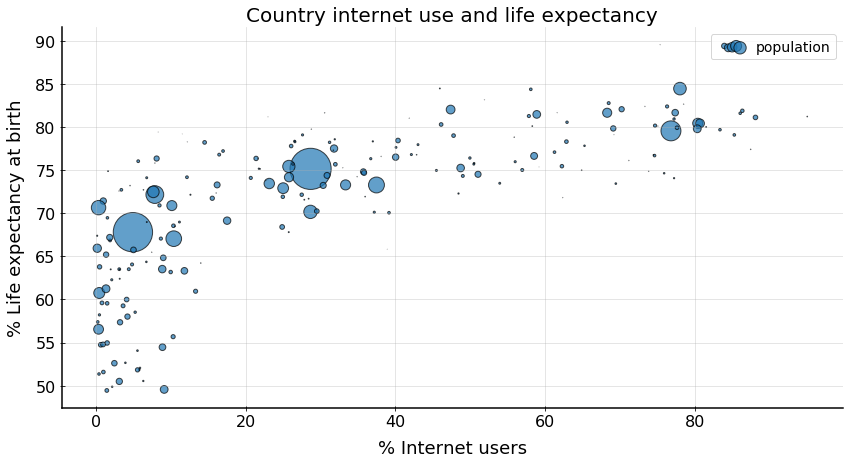

In [9]:
import matplotlib.ticker as mtick

df5 = pd.read_csv(path+'/cia_factbook.csv')
df5['percent_internet_users'] = ((df5['internet_users'] / df5['population']) * 100)

ax = df5.plot.scatter(
    x='percent_internet_users', 
    y='life_exp_at_birth',  
    s=df5['population']/800000,
    alpha=0.7,
    label='population');
ax.set(xlabel="% Internet users",
      ylabel="% Life expectancy at birth", 
      title='Country internet use and life expectancy');
# ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
ax.legend(markerscale=0.3, scatterpoints=6);

a) a non-linear association between life expectancy and internet use percentage  
b) observational retrospective  
c) a confounding variable would be something like a GDP of the country  

## 1.2 Stressed out, Part 1

a) type of study: e